In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=300,
                  centers=4, 
                  random_state=0, 
                  cluster_std=1.0)

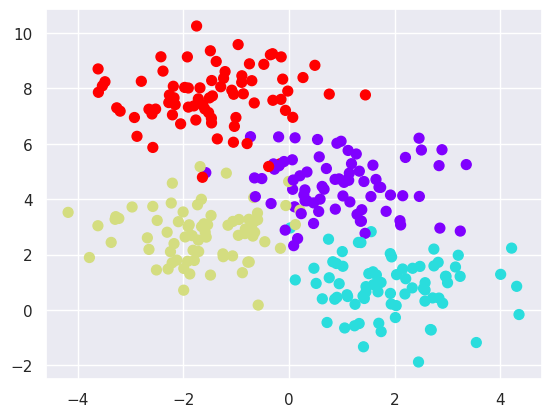

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [19]:
def visualize_classifer(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    #Drow train points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Train model
    model.fit(X, y)
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    #Make color plot with results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, 
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap=cmap,
                          clim=(y.min(), y.max()), 
                          zorder=1)
    
    ax.set(xlim=xlim, ylim=ylim)

/tmp/ipykernel_12771/4030156401.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


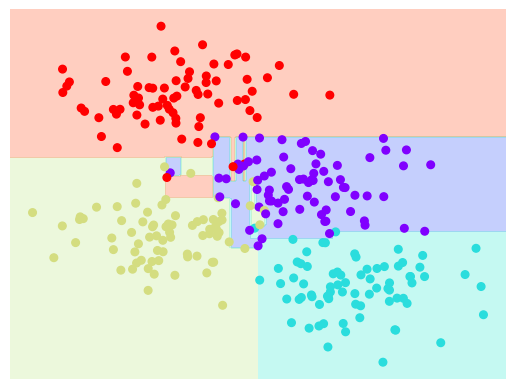

In [20]:
visualize_classifer(DecisionTreeClassifier(), X, y);

In [21]:
import helpers_05_08

In [22]:
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

In [26]:
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
tree = DecisionTreeClassifier()

In [44]:
bag = BaggingClassifier(tree, 
                        n_estimators=100, 
                        max_samples=0.8, 
                        random_state=1)

In [45]:
bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

/tmp/ipykernel_12771/4030156401.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


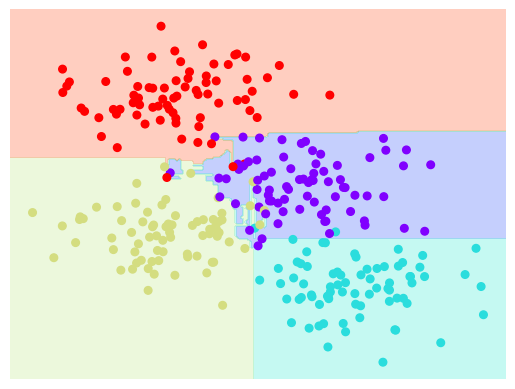

In [48]:
visualize_classifer(bag, X, y);

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

/tmp/ipykernel_12771/4030156401.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


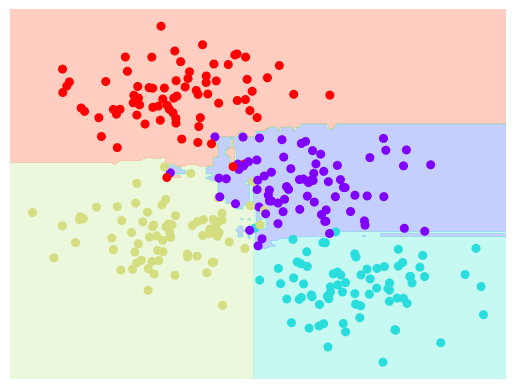

In [52]:
visualize_classifer(model, X, y);

In [53]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

In [54]:
y = model(x)

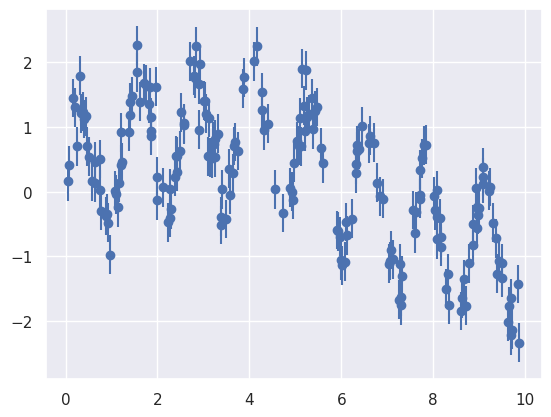

In [55]:
plt.errorbar(x, y, 0.3, fmt='o');

In [56]:
from sklearn.ensemble import RandomForestRegressor

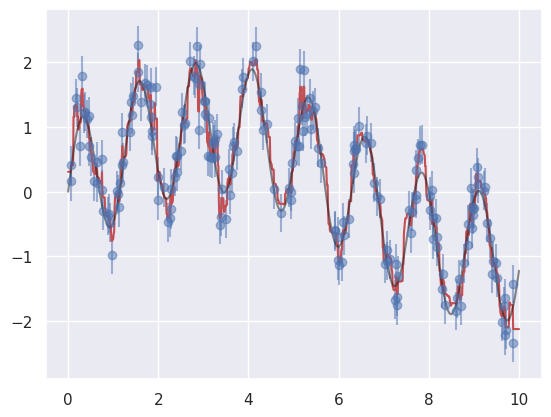

In [59]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [60]:
from sklearn.datasets import load_digits

In [61]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

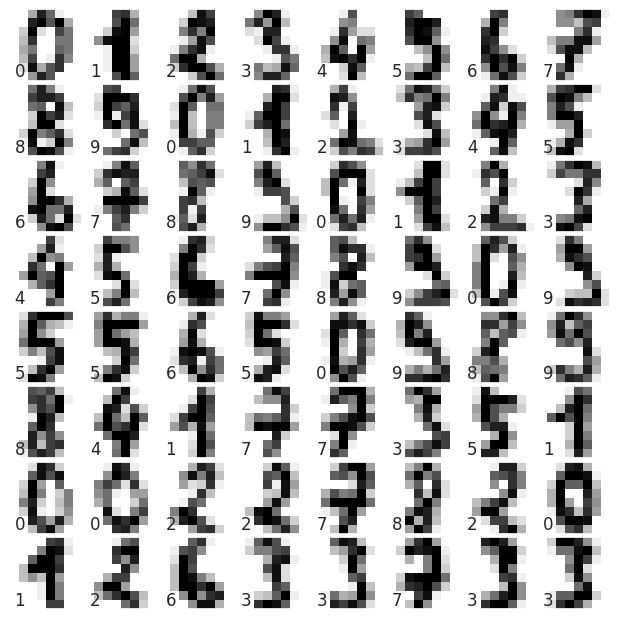

In [64]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [71]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

In [72]:
Xtrain.shape

(1347, 64)

In [73]:
ytrain.shape

(1347,)

In [74]:
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [87]:
print(model.predict_proba(Xtest))

[[0.   0.01 0.85 ... 0.03 0.04 0.  ]
 [0.01 0.04 0.06 ... 0.03 0.67 0.06]
 [0.   0.01 0.99 ... 0.   0.   0.  ]
 ...
 [0.   0.01 0.01 ... 0.   0.   0.03]
 [0.   0.64 0.02 ... 0.01 0.26 0.02]
 [0.   0.   0.   ... 0.   0.   0.87]]


In [75]:
from sklearn import metrics

In [76]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.96      0.98      0.97        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [78]:
from sklearn.metrics import confusion_matrix

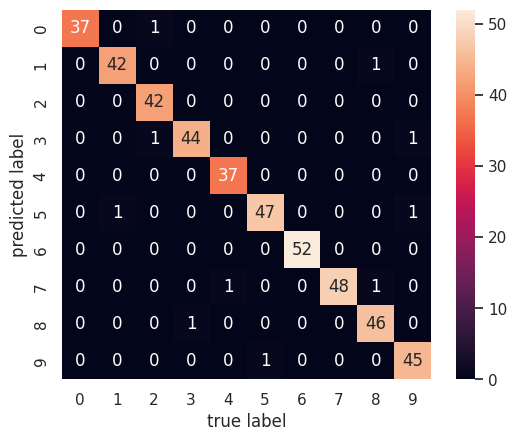

In [85]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');